<a href="https://colab.research.google.com/github/mahendravarman06/potholes-detection/blob/main/Potholes_Detection_YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing the libraries***

In [ ]:
import os
import glob
from IPython.display import Image,display
from IPython import display
display.clear_output()

***Switching runtime to GPU t4***

In [ ]:
!nvidia-smi

Fri Oct 13 08:00:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

***Declaring a variable called HOME to store the path***

In [ ]:
HOME = os.getcwd()

In [ ]:
print(HOME)

/content


***Installing the libraries of YOLO v8 (Ultralytics)***

In [ ]:
!pip install Ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 641.0/641.0 kB 10.7 MB/s eta 0:00:00


***Importing and checking the Library***

In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.197 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


***Importing the Created Dataset from Roboflow***

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YtSYneQNGEnhPUz5vc2m")
project = rf.workspace("pothole-detection-mlggg").project("potholedetectionusingyolov8")
dataset = project.version(1).download("yolov5")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Success

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PotholeDetectionUsingYOLOv8-1 in yolov5pytorch:: 100%|██████████| 2898/2898 [00:00<00:00, 4201.20it/s]


***Changing the Directory to Dataset location***

In [ ]:
%cd {HOME}

/content


In [ ]:
%cd {dataset.location}

/content/datasets/PotholeDetectionUsingYOLOv8-1


***Training the model using YOLO v8 large algorithm***

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data=/content/datasets/PotholeDetectionUsingYOLOv8-1/data.yaml epochs=70 imgsz=640

/content
Ultralytics YOLOv8.0.197 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/datasets/PotholeDetectionUsingYOLOv8-1/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True

***Checking the Trained Documents***

In [ ]:
!ls {HOME}//runs/detect/train2

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    train_batch4740.jpg
events.out.tfevents.1697184225.ca0853228334.1716.0  train_batch4741.jpg
F1_curve.png					    train_batch4742.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


***Displaying the confusion matrix***

/content


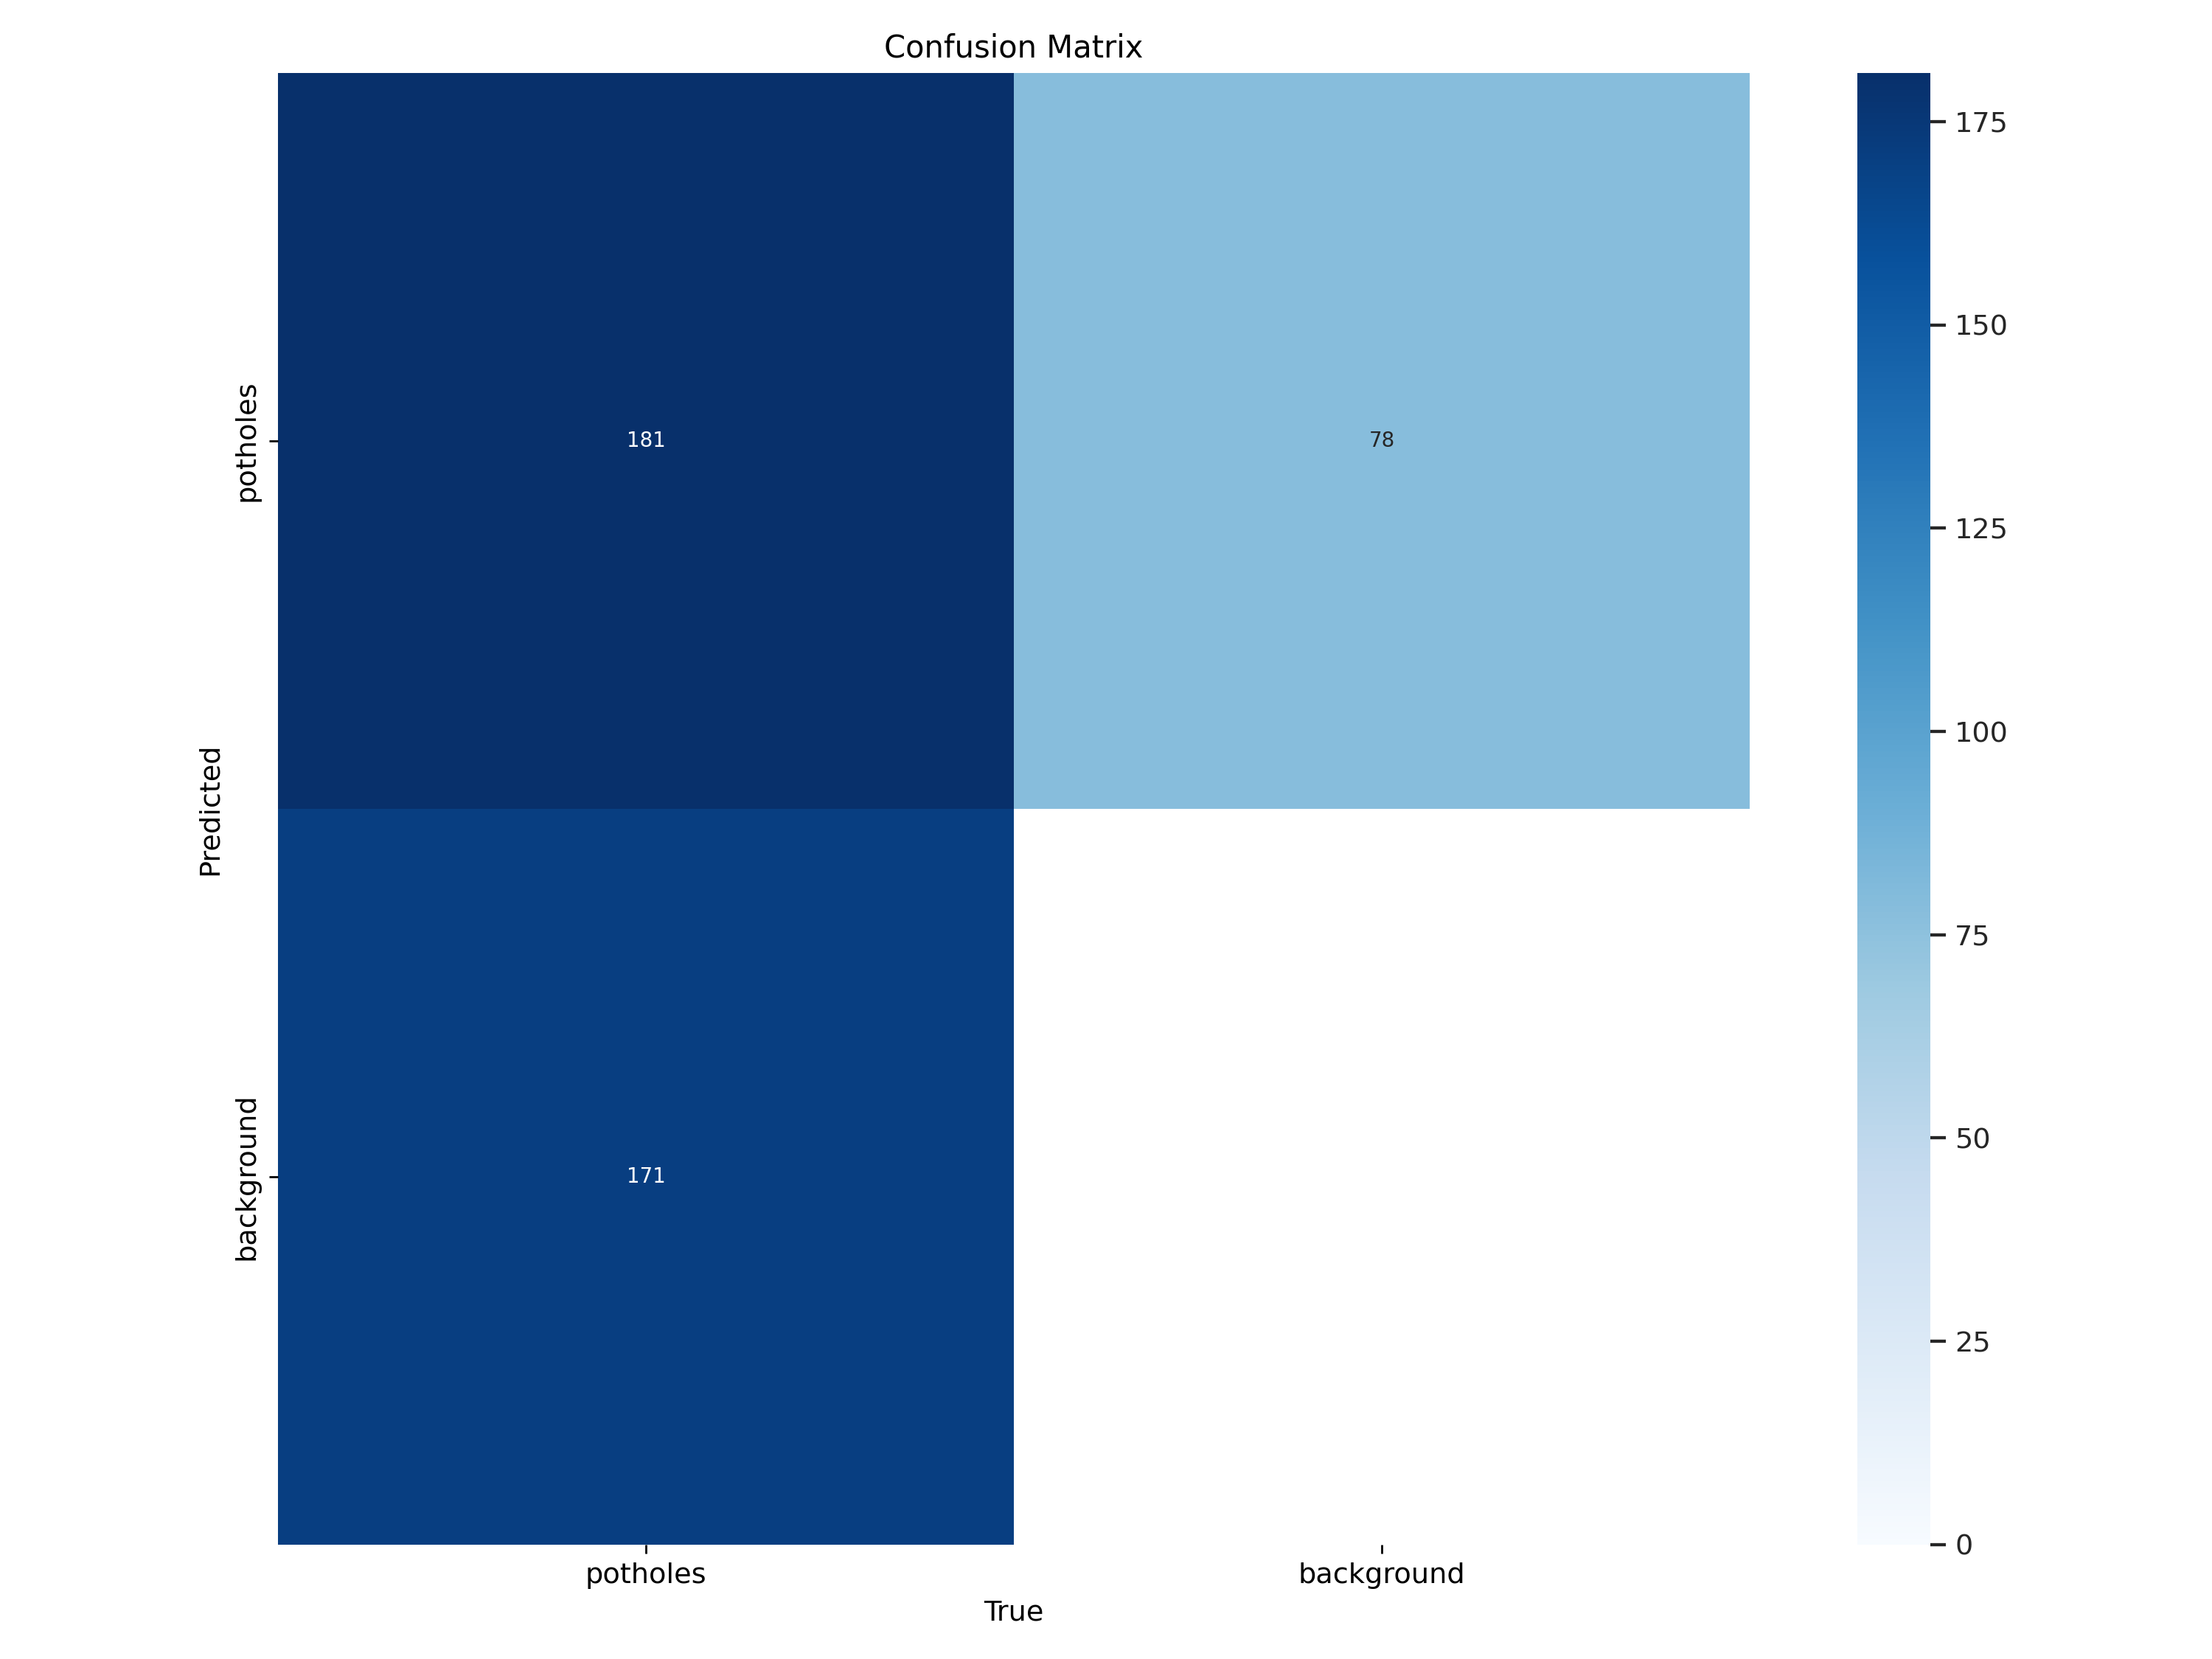

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png',width=900)

***Displayind the Train Results***

/content


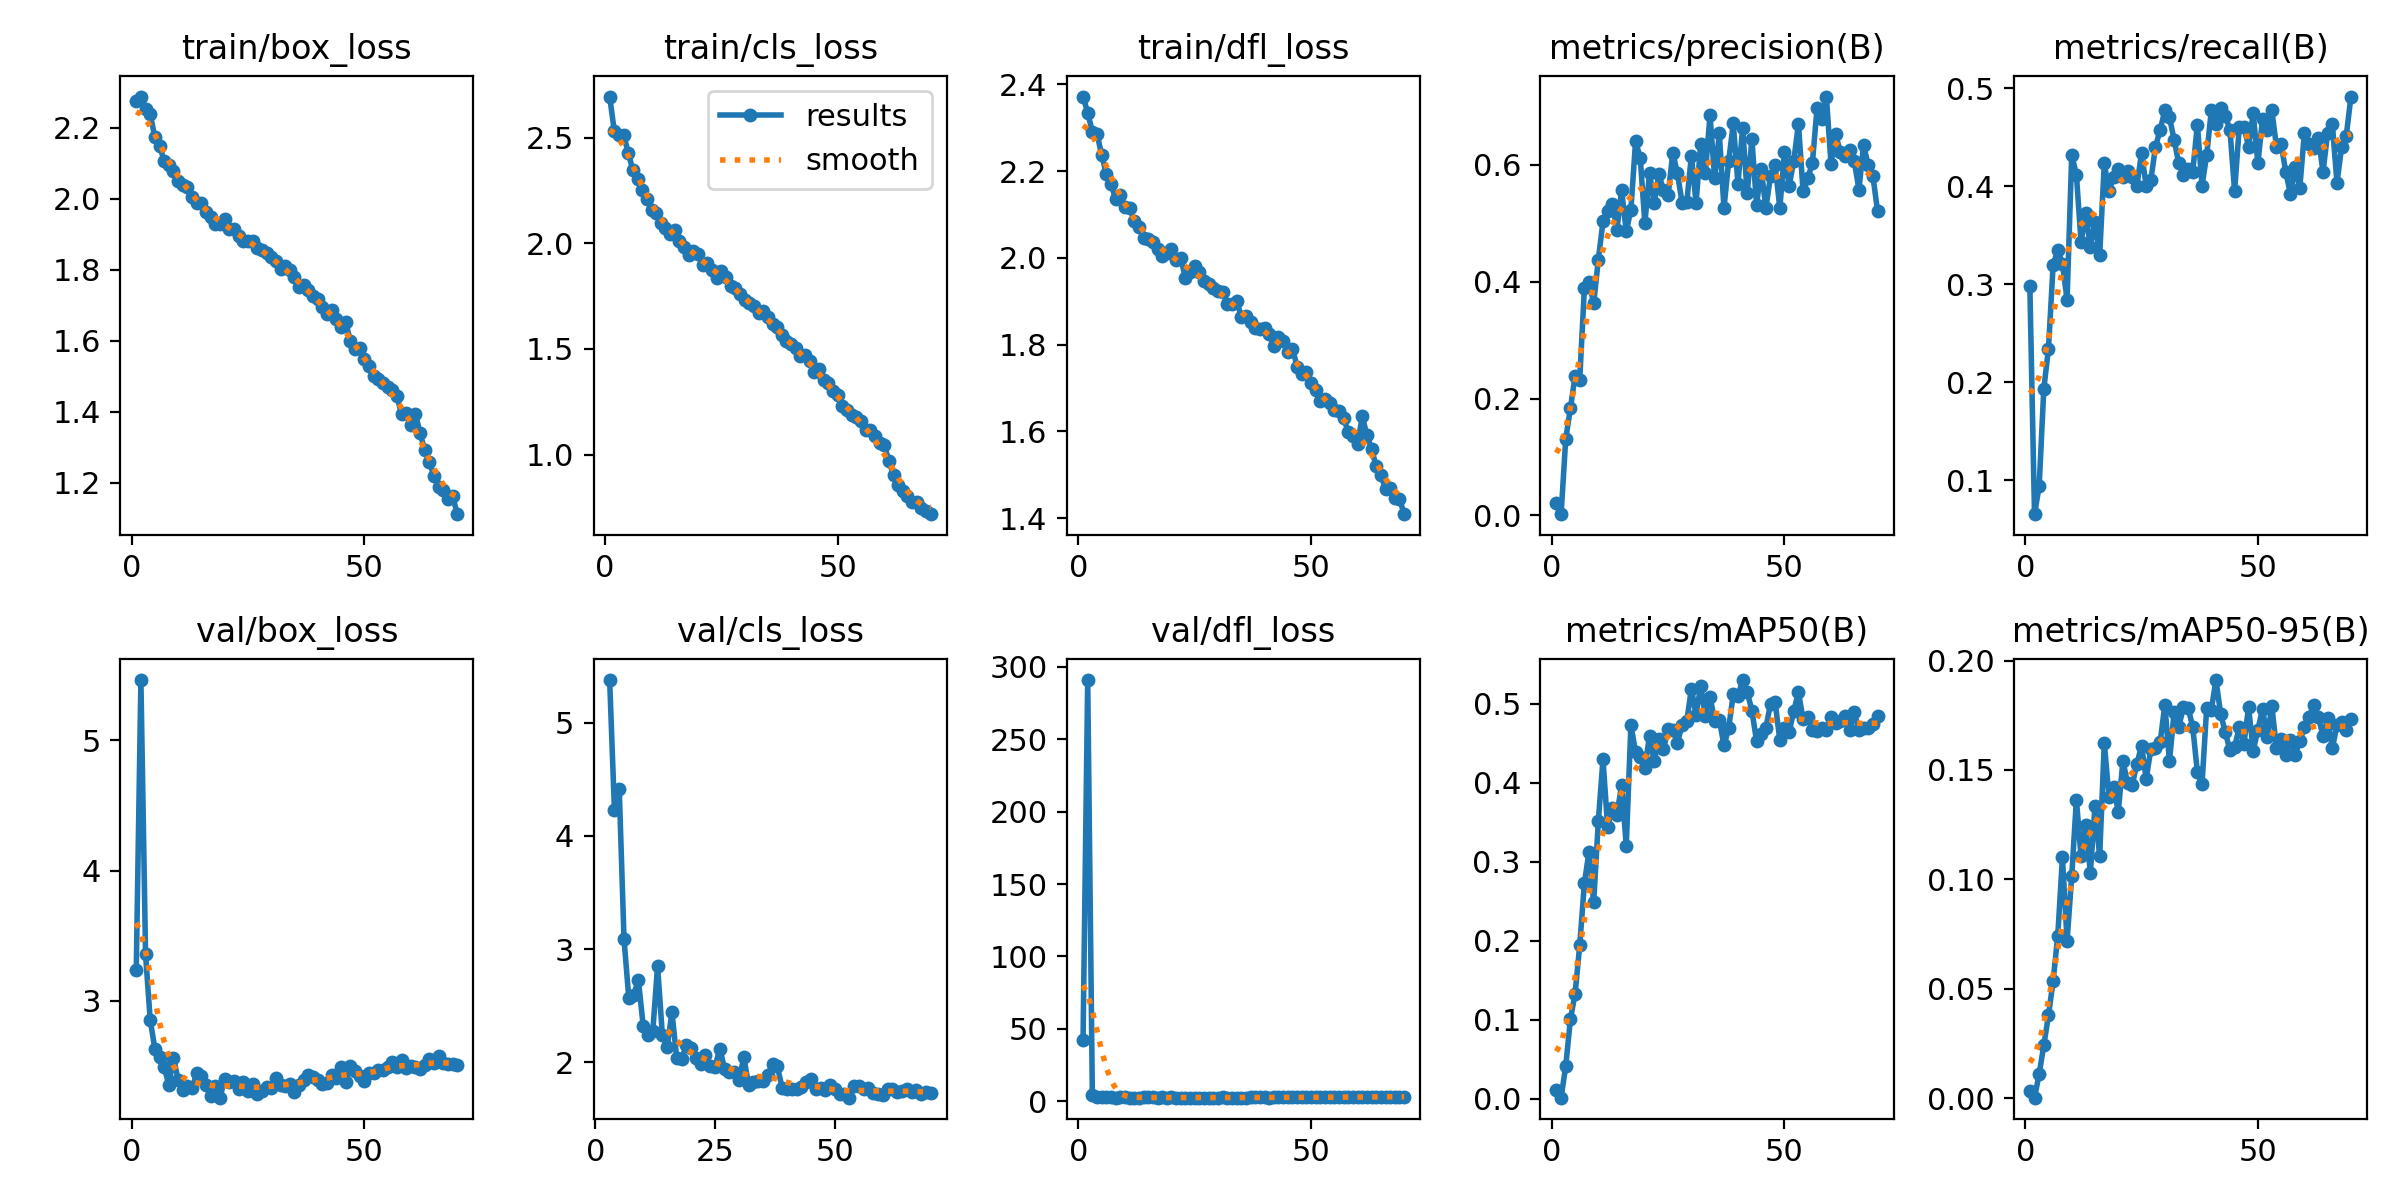

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png',width=600)

***Displaying the Predicted Images***

/content


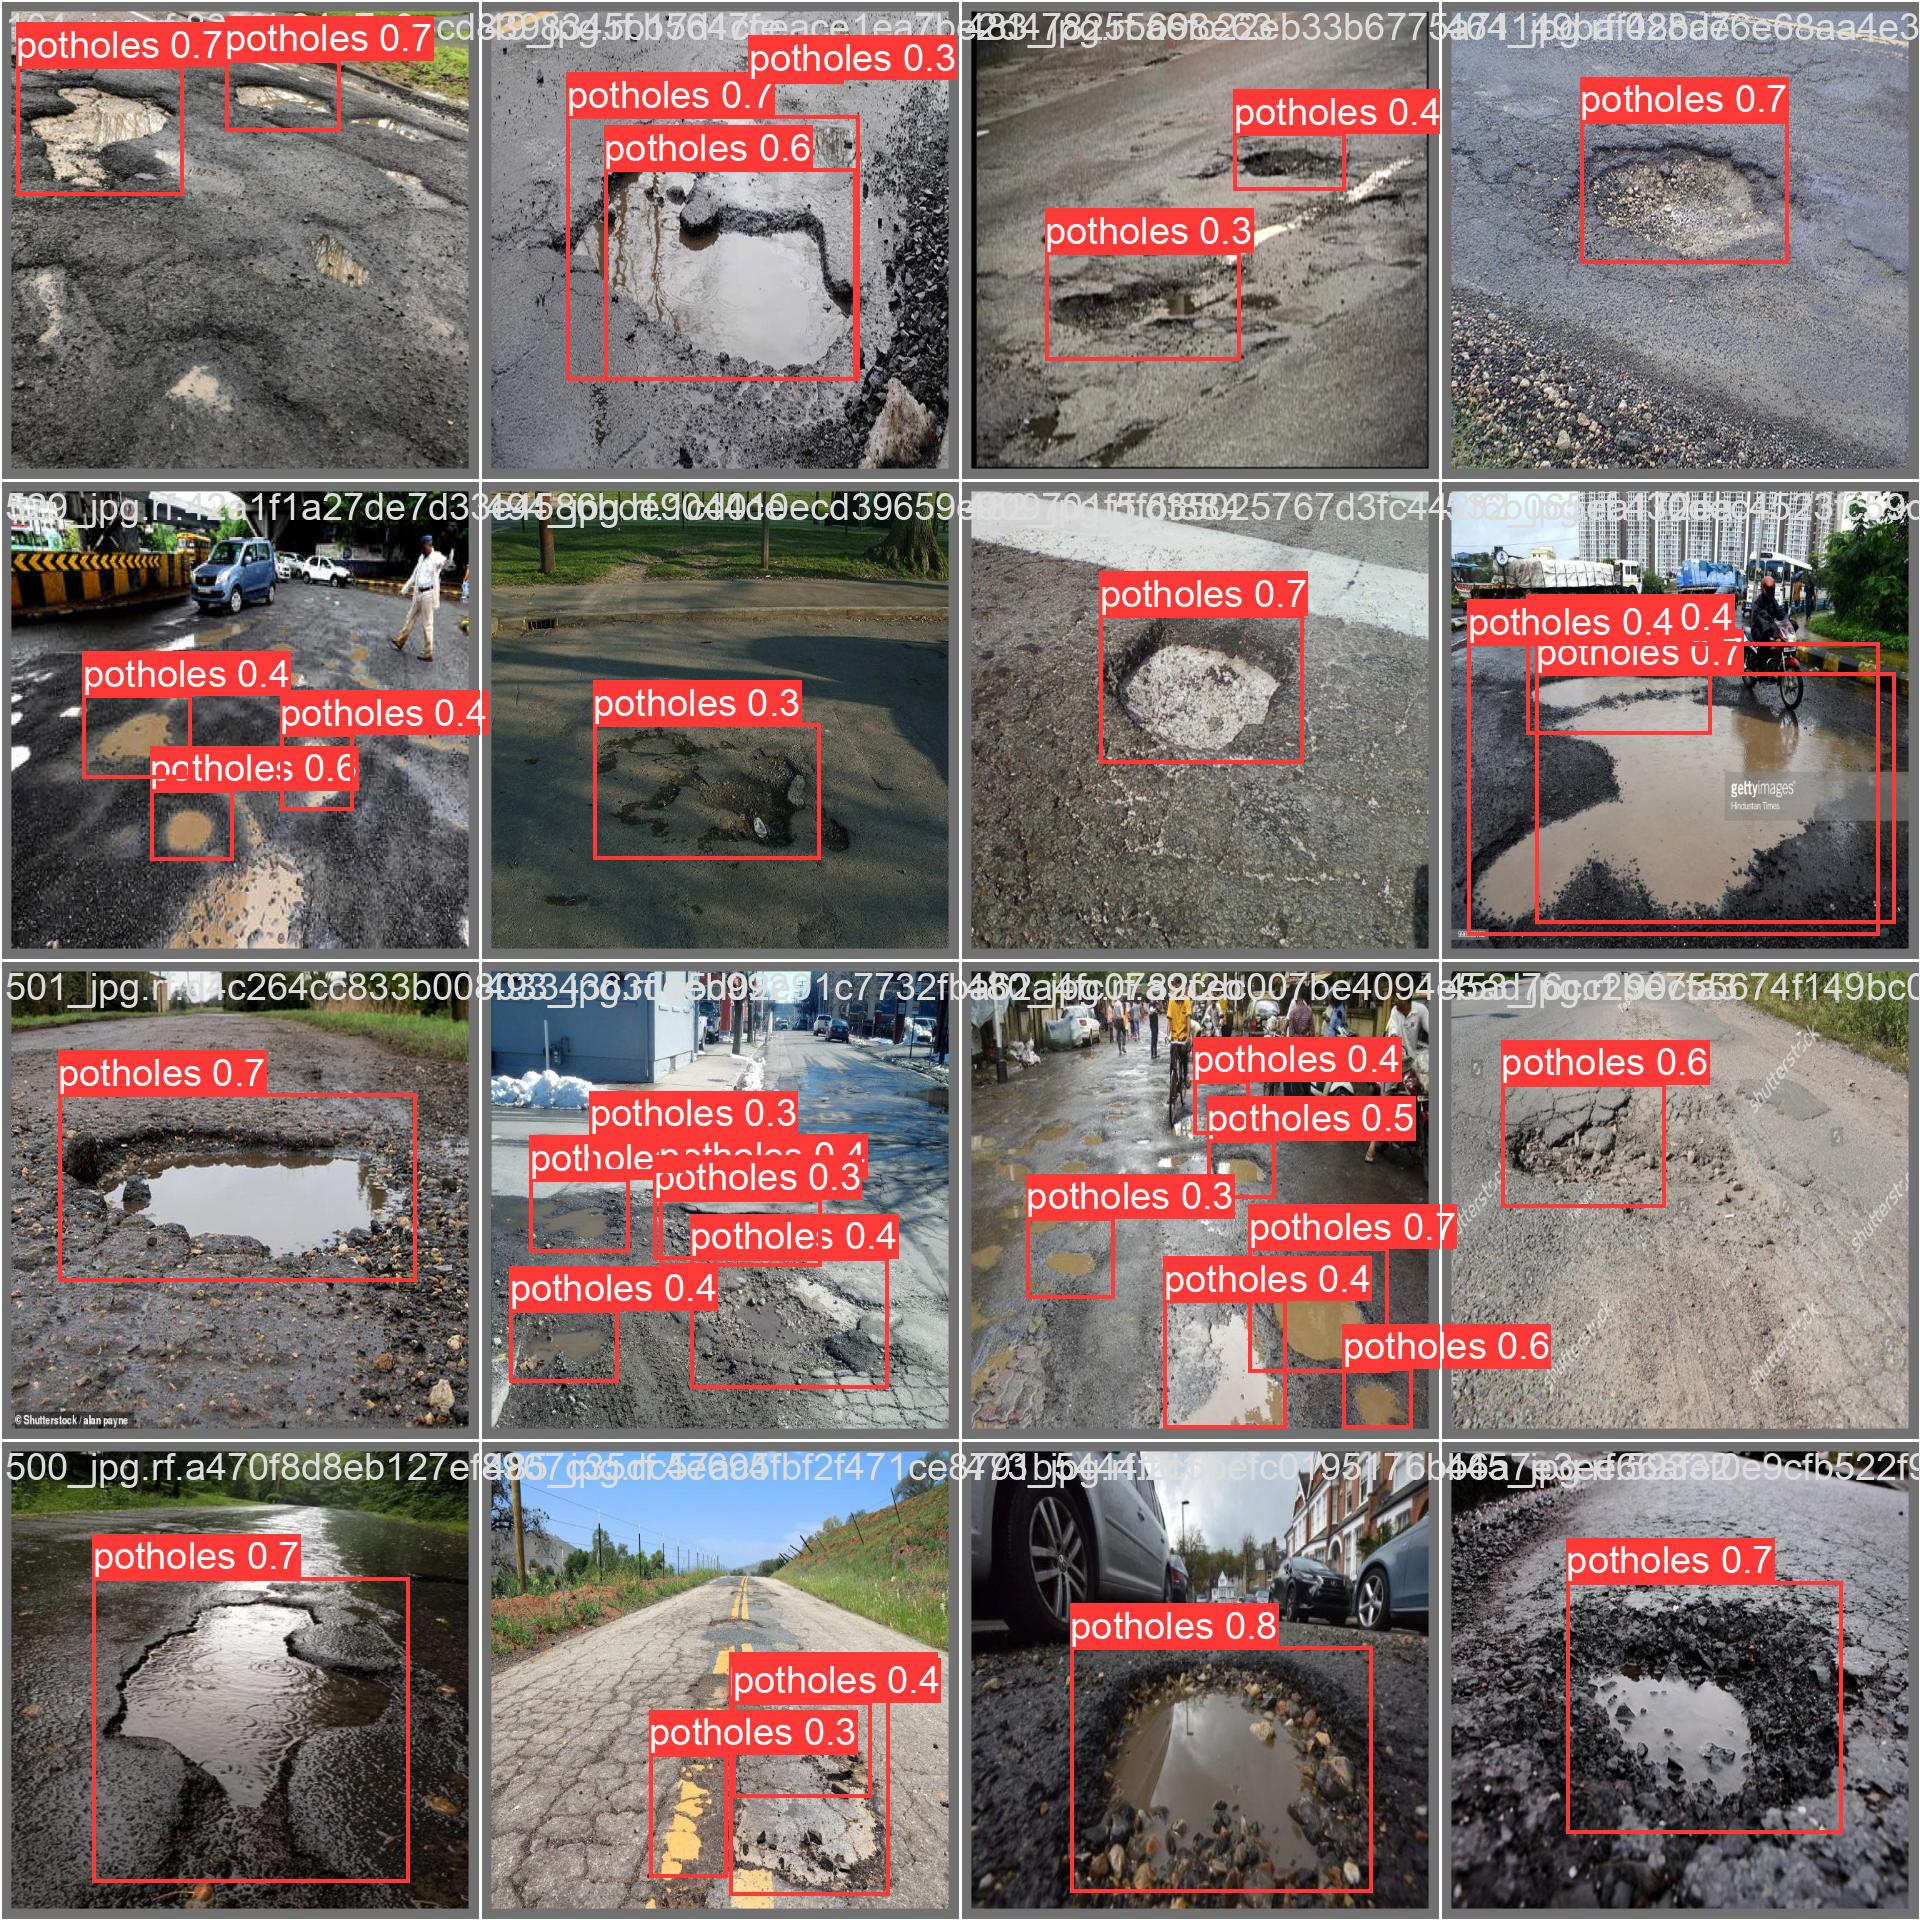

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg',width=600)

***Validating the model***

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data=/content/datasets/PotholeDetectionUsingYOLOv8-1/data.yaml

/content
Ultralytics YOLOv8.0.197 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/datasets/PotholeDetectionUsingYOLOv8-1/valid/labels.cache... 121 images, 0 backgrounds, 0 corrupt: 100% 121/121 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 11, len(boxes) = 352. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:07<00:00,  1.01it/s]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/PIL/ImageFile.py", line 518, in _save
    fh = fp.fileno()
AttributeError: '_idat' object has no attribute 'fileno'

During handling of the above exception, another exception occurred:

Trace

***Testing the model***

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/datasets/PotholeDetectionUsingYOLOv8-1/test/images

/content
Ultralytics YOLOv8.0.197 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/61 /content/datasets/PotholeDetectionUsingYOLOv8-1/test/images/111_jpg.rf.a3911ffcab06212792c52d971371f446.jpg: 640x640 1 potholes, 63.0ms
image 2/61 /content/datasets/PotholeDetectionUsingYOLOv8-1/test/images/117_jpg.rf.9e8a36e72f24b19f7b63c05bf02ae875.jpg: 640x640 (no detections), 39.6ms
image 3/61 /content/datasets/PotholeDetectionUsingYOLOv8-1/test/images/119_jpg.rf.f11cff1410a03764f0ad1cad63168c03.jpg: 640x640 1 potholes, 39.3ms
image 4/61 /content/datasets/PotholeDetectionUsingYOLOv8-1/test/images/121_jpg.rf.90cdd2e7529a844c78eb656a3b5e399b.jpg: 640x640 1 potholes, 39.2ms
image 5/61 /content/datasets/PotholeDetectionUsingYOLOv8-1/test/images/139_jpg.rf.4c18ffc0a837e065473ae1c8b660774d.jpg: 640x640 3 potholess, 39.2ms
image 6/61 /content/datasets/PotholeDetectionUsingYOLOv8-1/test/images/14_jpg.r

***Sample of the Tested Image***

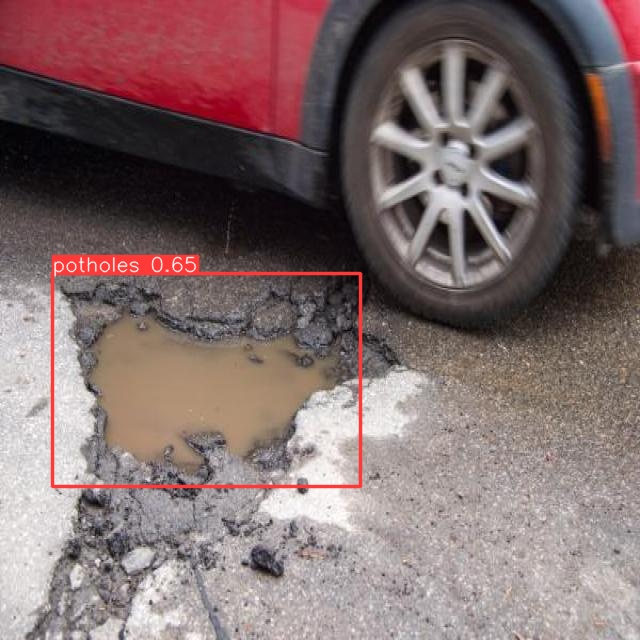

In [ ]:
Image("/content/runs/detect/predict/207_jpg.rf.02ac4cde9ea57c0d792dc2cd55f7ae1f.jpg")

***Tesing the model with a Video file***

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/pothole demo 2.mp4'

/content
Ultralytics YOLOv8.0.197 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

video 1/1 (1/400) /content/pothole demo 2.mp4: 384x640 (no detections), 105.1ms
video 1/1 (2/400) /content/pothole demo 2.mp4: 384x640 (no detections), 31.3ms
video 1/1 (3/400) /content/pothole demo 2.mp4: 384x640 (no detections), 31.3ms
video 1/1 (4/400) /content/pothole demo 2.mp4: 384x640 (no detections), 31.3ms
video 1/1 (5/400) /content/pothole demo 2.mp4: 384x640 (no detections), 26.4ms
video 1/1 (6/400) /content/pothole demo 2.mp4: 384x640 (no detections), 26.5ms
video 1/1 (7/400) /content/pothole demo 2.mp4: 384x640 (no detections), 26.4ms
video 1/1 (8/400) /content/pothole demo 2.mp4: 384x640 (no detections), 26.4ms
video 1/1 (9/400) /content/pothole demo 2.mp4: 384x640 (no detections), 26.4ms
video 1/1 (10/400) /content/pothole demo 2.mp4: 384x640 (no detections), 26.5ms
video 1/1 (11/400) /content/